In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with= engine)

In [48]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

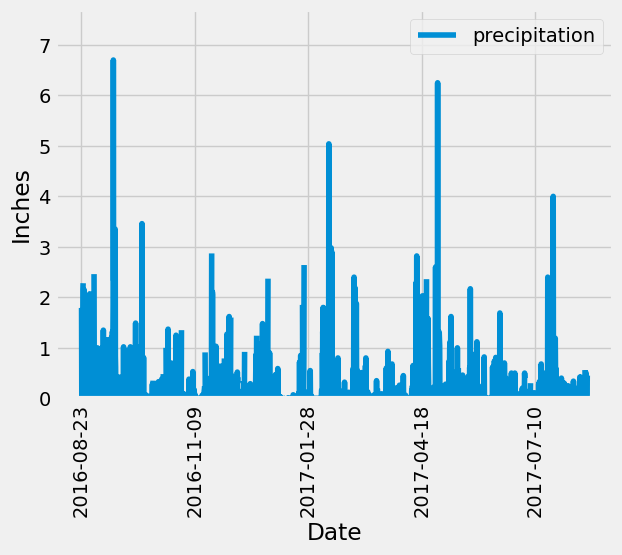

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurementdf = pd.DataFrame(precipitation_query).rename(columns = {'prcp': 'precipitation'})
measurementdf = measurementdf.set_index('date')

# Sort the dataframe by date
measurementdf = measurementdf.sort_values(by = ['date'])

# Use Pandas Plotting with Matplotlib to plot the data
measurementdf.plot(rot=90)
plt.ylim(0,7.7)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(loc = 'upper right')

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurestats = measurementdf.describe()
measurestats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).first().__dict__
session.query(measurement).first().__dict__
total_number = len(session.query(station).all())
total_number 

9

In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station,
                               func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tem = [measurement.station, 
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]
most_active = session.query(*sel).filter_by(station = "USC00519281").all()
print(most_active)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

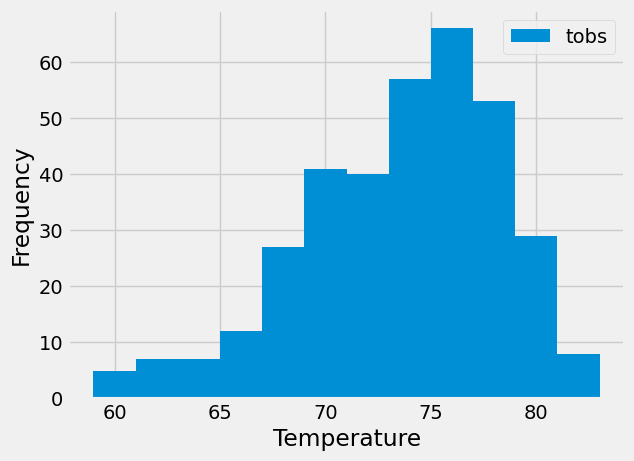

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_months = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= year_ago).all()
#convert to dataframe to plot data
last_months_df = pd.DataFrame(last12)
#plot
last_months_df.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()